In [1]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=False)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Training Dataset: https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Training.zip

In [2]:
!wget https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Training.zip

--2022-12-01 17:13:47--  https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Training.zip
Resolving btsd.ethz.ch (btsd.ethz.ch)... 129.132.52.168, 2001:67c:10ec:36c2::168
Connecting to btsd.ethz.ch (btsd.ethz.ch)|129.132.52.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174298785 (166M) [application/zip]
Saving to: ‘BelgiumTSC_Training.zip’

BelgiumTSC_Training 100%[===================>] 166.22M  7.32MB/s    in 22s     

2022-12-01 17:14:09 (7.67 MB/s) - ‘BelgiumTSC_Training.zip’ saved [174298785/174298785]



Test Dataset: https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Testing.zip

In [3]:
!wget https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Testing.zip

--2022-12-01 17:14:11--  https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Testing.zip
Resolving btsd.ethz.ch (btsd.ethz.ch)... 129.132.52.168, 2001:67c:10ec:36c2::168
Connecting to btsd.ethz.ch (btsd.ethz.ch)|129.132.52.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77877833 (74M) [application/zip]
Saving to: ‘BelgiumTSC_Testing.zip’

BelgiumTSC_Testing. 100%[===================>]  74.27M  9.53MB/s    in 9.1s    

2022-12-01 17:14:20 (8.20 MB/s) - ‘BelgiumTSC_Testing.zip’ saved [77877833/77877833]



In [5]:
!unzip /content/BelgiumTSC_Training.zip

Archive:  /content/BelgiumTSC_Training.zip
   creating: Training/
   creating: Training/00000/
  inflating: Training/00000/01153_00000.ppm  
  inflating: Training/00000/01153_00001.ppm  
  inflating: Training/00000/01153_00002.ppm  
  inflating: Training/00000/01160_00000.ppm  
  inflating: Training/00000/01160_00001.ppm  
  inflating: Training/00000/01160_00002.ppm  
  inflating: Training/00000/01797_00000.ppm  
  inflating: Training/00000/01797_00001.ppm  
  inflating: Training/00000/01797_00002.ppm  
  inflating: Training/00000/01798_00000.ppm  
  inflating: Training/00000/01798_00001.ppm  
  inflating: Training/00000/01798_00002.ppm  
  inflating: Training/00000/01799_00000.ppm  
  inflating: Training/00000/01799_00001.ppm  
  inflating: Training/00000/01799_00002.ppm  
  inflating: Training/00000/GT-00000.csv  
   creating: Training/00001/
  inflating: Training/00001/00025_00000.ppm  
  inflating: Training/00001/00025_00001.ppm  
  inflating: Training/00001/00025_00002.ppm  
  inf

Traindata & TestData Variables

In [7]:
import torchvision
test_path = '/content/Testing'
train_path = '/content/Training'

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomAutocontrast(),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


data = torchvision.datasets.ImageFolder(root=train_path, transform=preprocess)

#train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True,  num_workers=0)

train_size = int(0.8 * len(data))
test_size = len(data) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(data, [train_size, test_size])


#train_data = torchvision.datasets.ImageFolder(root=train_path,transform=preprocess)
train_dataLoader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True,  num_workers=0)
print('Train',len(train_dataset))

#test_data = torchvision.datasets.ImageFolder(root=train_path,transform=preprocess)
print('TEST',len(test_dataset))
test_dataLoader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True,  num_workers=0)


Train 3660
TEST 915


Hyper Parameters

In [8]:
num_classes = 62
num_epochs = 20
batch_size = 128
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
if torch.cuda.is_available():
    model.cuda()

cuda


In [9]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [10]:
import time
start_time = time.time()
total_step = len(train_dataLoader)
accuracy_list = []

steps_list = []
train_loss = []
train_accuracy = []
train_loss = []

for epoch in range(num_epochs):
  for i, data in enumerate(train_dataLoader):
    images, labels = data[0].to(device), data[1].to(device)

    #Forward Pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    #Backpropogation and Optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Train Accuracy
    total = labels.size(0)
    _, predicted = torch.max(outputs.data,1)

    correct = (predicted == labels).sum().item()
    
    steps = i + 1
    accuracy = (correct / total) * 100
    accuracy_list.append(accuracy)
    steps_list.append(steps)
    train_loss.append(loss.item())
    print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
          .format(epoch + 1, num_epochs, steps, total_step, loss.item(),
          accuracy))
    
    

print("######## Training Finished in {} seconds ###########".format(time.time()-start_time))
print("Accuracy List: ",accuracy_list, "Steps List: ",steps_list)

Epoch [1/20], Step [1/58], Loss: 6.9075, Accuracy: 0.00%
Epoch [1/20], Step [2/58], Loss: 7.5284, Accuracy: 15.62%
Epoch [1/20], Step [3/58], Loss: 6.7577, Accuracy: 3.12%
Epoch [1/20], Step [4/58], Loss: 6.4822, Accuracy: 6.25%
Epoch [1/20], Step [5/58], Loss: 5.1675, Accuracy: 17.19%
Epoch [1/20], Step [6/58], Loss: 9.5635, Accuracy: 9.38%
Epoch [1/20], Step [7/58], Loss: 4.9751, Accuracy: 9.38%
Epoch [1/20], Step [8/58], Loss: 4.8059, Accuracy: 4.69%
Epoch [1/20], Step [9/58], Loss: 5.1374, Accuracy: 12.50%
Epoch [1/20], Step [10/58], Loss: 4.6887, Accuracy: 1.56%
Epoch [1/20], Step [11/58], Loss: 4.7662, Accuracy: 3.12%
Epoch [1/20], Step [12/58], Loss: 4.6331, Accuracy: 1.56%
Epoch [1/20], Step [13/58], Loss: 4.2508, Accuracy: 7.81%
Epoch [1/20], Step [14/58], Loss: 4.0394, Accuracy: 1.56%
Epoch [1/20], Step [15/58], Loss: 4.1762, Accuracy: 7.81%
Epoch [1/20], Step [16/58], Loss: 4.4238, Accuracy: 3.12%
Epoch [1/20], Step [17/58], Loss: 4.4201, Accuracy: 1.56%
Epoch [1/20], Step [

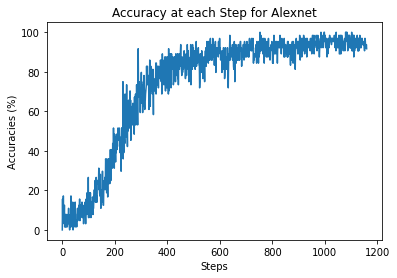

In [11]:
import matplotlib.pyplot as pyplot
import numpy as np

x_axis = np.array(steps_list)
y_axis = np.array(accuracy_list)

pyplot.title("Accuracy at each Step for Alexnet")
pyplot.xlabel("Steps")
pyplot.ylabel("Accuracies (%)")
pyplot.plot(accuracy_list)

pyplot.show()

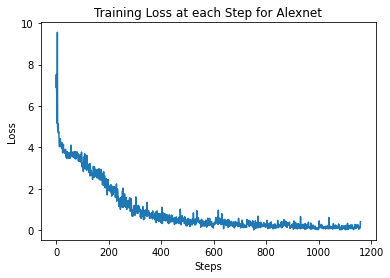

In [12]:
import matplotlib.pyplot as pyplot
import numpy as np

x_axis = np.array(steps_list)
y_axis = np.array(accuracy_list)

pyplot.title("Training Loss at each Step for Alexnet")
pyplot.xlabel("Steps")
pyplot.ylabel("Loss")
pyplot.plot(train_loss)

pyplot.show()

In [13]:
from torch.autograd import Variable
test_loss = []
test_accuracy = []
import torch.nn.functional as F

pred_y = []
lable_given_img = []

def evaluate(data_loader):
    model.eval()
    loss = 0
    correct = 0
    total = 0
    for data, target in data_loader:
       
        data, target = Variable(data, volatile=True), Variable(target)
        if torch.cuda.is_available():
            data = data.cuda()
            target = target.cuda()
        
        output = model(data)

        loss += F.cross_entropy(output, target, size_average=False).item()
        pred = torch.max(output.data, 1)[1]
        #print(pred)
        total += len(data)

        for i in pred :
          pred_y.append(i.abs().tolist())
        for i in target :
          lable_given_img.append(i.abs().tolist())
        correct += (pred == target).sum()

    loss /= len(data_loader.dataset)
    test_loss.append(loss)    
    test_accuracy.append(100 * correct / total)
    print('\nAverage Validation loss: {:.5f}\tAccuracy: {} %'.format(loss, 100 * correct / total))
    print('correct:',correct)

In [15]:
for epoch in range(2):
  evaluate(test_dataLoader)

<ipython-input-13-e60f1fb1ece2>:16: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)



Average Validation loss: 0.29940	Accuracy: 91.80328369140625 %
correct: tensor(840, device='cuda:0')

Average Validation loss: 0.29370	Accuracy: 92.02185821533203 %
correct: tensor(842, device='cuda:0')


              precision    recall  f1-score   support

           0       1.00      0.32      0.49        28
           1       0.97      0.85      0.91       126
           2       1.00      0.64      0.78        11
           3       0.38      1.00      0.55         6
           4       0.73      0.69      0.71        16
           5       1.00      0.20      0.33         5
           6       0.67      0.67      0.67        18
           7       0.91      0.97      0.94       166
           8       1.00      0.81      0.90        27
           9       0.30      1.00      0.46        12
          10       1.00      1.00      1.00        23
          12       0.97      1.00      0.98        32
          13       0.98      0.95      0.96        85
          14       0.95      0.88      0.91        48
          15       1.00      0.23      0.37        22
          16       0.33      0.36      0.35        11
          17       0.86      0.90      0.88        48
          18       0.84    

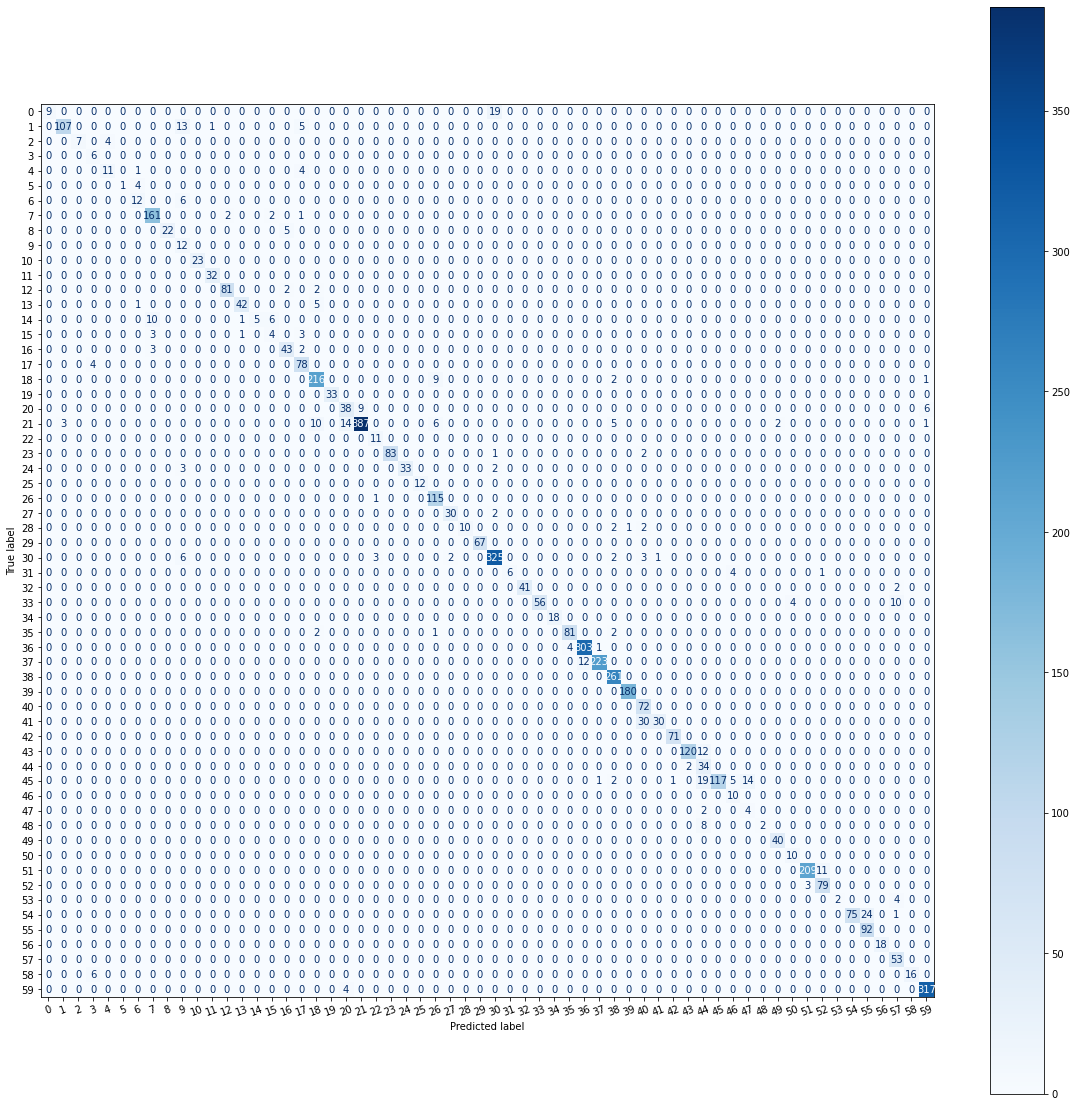

In [18]:
# Print confusion matrix
import matplotlib.pyplot as pyplot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

def plot_confusion_matrix(labels, pred_labels, classes):
    
    fig = plt.figure(figsize = (20, 20));
    ax = fig.add_subplot(1, 1, 1);
    cm = confusion_matrix(labels, pred_labels);
    cm = ConfusionMatrixDisplay(cm, display_labels = classes);
    cm.plot(values_format = 'd', cmap = 'Blues', ax = ax)
    plt.xticks(rotation = 20)
    
labels_arr = range(0, num_classes)
plot_confusion_matrix(lable_given_img, pred_y, labels_arr)

from sklearn.metrics import classification_report
print(classification_report(lable_given_img, pred_y))

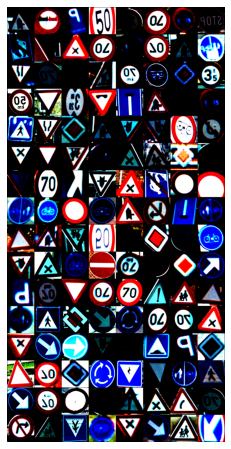

In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

for images, _ in test_dataLoader:
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=8).permute((1, 2, 0)))
    break

In [19]:
PATH = '/content/Alex_BTSD.pt'
torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': train_loss,
            'accuracy': accuracy_list,
            'test_loss': test_loss,
            'test_accuracy':test_accuracy
            }, PATH)